In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold



In [256]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,0,6,148,72,35,0,33.6,0.627,50,1,B,1,IND,50
1,1,1,85,66,29,0,26.6,0.351,31,0,B,1,IND,31
2,2,8,183,64,0,0,23.3,0.672,32,1,B,1,IND,32
3,3,1,89,66,23,94,28.1,0.167,21,0,B,1,IND,21
4,4,0,137,40,35,168,43.1,2.288,33,1,B,1,IND,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0,W,1,IND,63
764,764,2,122,70,27,0,36.8,0.340,27,0,W,1,IND,27
765,765,5,121,72,23,112,26.2,0.245,30,0,W,1,IND,30
766,766,1,126,60,0,0,30.1,0.349,47,1,W,1,IND,47


In [257]:
data.shape

(768, 14)

In [258]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome', 'HairColor', 'Adult', 'Country', 'Age_1'],
      dtype='object')

In [259]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [260]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,1,B,1,IND,50
1,1,85,66,29,0,26.6,0.351,31,0,B,1,IND,31
2,8,183,64,0,0,23.3,0.672,32,1,B,1,IND,32
3,1,89,66,23,94,28.1,0.167,21,0,B,1,IND,21
4,0,137,40,35,168,43.1,2.288,33,1,B,1,IND,33


### Label enncoding

In [261]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
data['HairColor'] = lbl.fit_transform(data['HairColor'])
data['Country'] = lbl.fit_transform(data['Country'])

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,1,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,33


In [262]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

x,y

(     Pregnancies  Glucose  BloodPressure  ...  Adult  Country  Age_1
 0              6      148             72  ...      1        0     50
 1              1       85             66  ...      1        0     31
 2              8      183             64  ...      1        0     32
 3              1       89             66  ...      1        0     21
 4              0      137             40  ...      1        0     33
 ..           ...      ...            ...  ...    ...      ...    ...
 763           10      101             76  ...      1        0     63
 764            2      122             70  ...      1        0     27
 765            5      121             72  ...      1        0     30
 766            1      126             60  ...      1        0     47
 767            1       93             70  ...      1        0     23
 
 [768 rows x 12 columns], 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length:

In [263]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
x_tr,x_tst,y_tr,y_tst = x_train,x_test,y_train,y_test

### Constant Features Removal

In [264]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [265]:
constant_filter.get_support().sum()

10

In [266]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False]

In [267]:
x_train = constant_filter.transform(x_train)
x_test = constant_filter.transform(x_test)
x_train.shape,x_test.shape

((614, 10), (154, 10))

### Quasi constant feature removal

In [268]:
quasi_constant_filter = VarianceThreshold(threshold=0.1)
quasi_constant_filter.fit(x_train)

VarianceThreshold(threshold=0.1)

In [269]:
quasi_constant_filter.get_support().sum()

9

In [270]:
quasi_constant_list = [not temp for temp in quasi_constant_filter.get_support()]
quasi_constant_list  

[False, False, False, False, False, False, False, False, True, False]

In [271]:
x_train = quasi_constant_filter.transform(x_train)
x_test = quasi_constant_filter.transform(x_test)
x_train.shape,x_test.shape

((614, 9), (154, 9))

### Remove Duplicate Features

In [272]:
x_train_T = x_train.T
x_test_T = x_test.T

x_train_T.shape,x_test_T.shape

((9, 614), (9, 154))

In [273]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [274]:
x_train_T.duplicated().sum()

1

In [275]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
dtype: bool

In [276]:
features_to_keep = [not data for data in duplicated_features]
features_to_keep

[True, True, True, True, True, True, True, True, False]

In [277]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [278]:
x_train_unique.shape,x_test_unique.shape

((614, 8), (154, 8))

In [279]:
x_train_unique.head()

,0,1,2,3,4,5,6,7
0,7.0,150.0,78.0,29.0,126.0,35.2,0.692,54.0
1,4.0,97.0,60.0,23.0,0.0,28.2,0.443,22.0
2,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
3,1.0,109.0,56.0,21.0,135.0,25.2,0.833,23.0
4,8.0,120.0,0.0,0.0,0.0,30.0,0.183,38.0


### Build ML model and compare the performance of the selected feature

In [280]:
def randomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print("Accuracy(Testing Data) : ")
  print(accuracy_score(y_test,y_pred))

### Checking wheather the computational time is reduced or not in Original datas Vs Modified datas

In [281]:
%%time
randomForest(x_tr,x_tst,y_tr,y_tst)

Accuracy(Testing Data) : 
0.8051948051948052
CPU times: user 310 ms, sys: 52.8 ms, total: 363 ms
Wall time: 359 ms


In [282]:
x_tr.shape,x_train_unique.shape

((614, 12), (614, 8))

In [283]:
%%time
randomForest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy(Testing Data) : 
0.7857142857142857
CPU times: user 302 ms, sys: 46.4 ms, total: 349 ms
Wall time: 354 ms


### Finding the Correlation between the feauters

In [284]:
corrmat = x_train_unique.corr()
corrmat

,0,1,2,3,4,5,6,7
0,1.000000,0.127642,0.141417,-0.084695,-0.080762,0.003036,-0.047203,0.539582
1,0.127642,1.000000,0.147744,0.057374,0.326961,0.234836,0.118450,0.278075
2,0.141417,0.147744,1.000000,0.214119,0.081911,0.264209,0.052385,0.229556
3,-0.084695,0.057374,0.214119,1.000000,0.426754,0.405780,0.194594,-0.156347
4,-0.080762,0.326961,0.081911,0.426754,1.000000,0.192086,0.189132,-0.063597
5,0.003036,0.234836,0.264209,0.405780,0.192086,1.000000,0.145073,0.009823
6,-0.047203,0.118450,0.052385,0.194594,0.189132,0.145073,1.000000,0.027692
7,0.539582,0.278075,0.229556,-0.156347,-0.063597,0.009823,0.027692,1.000000


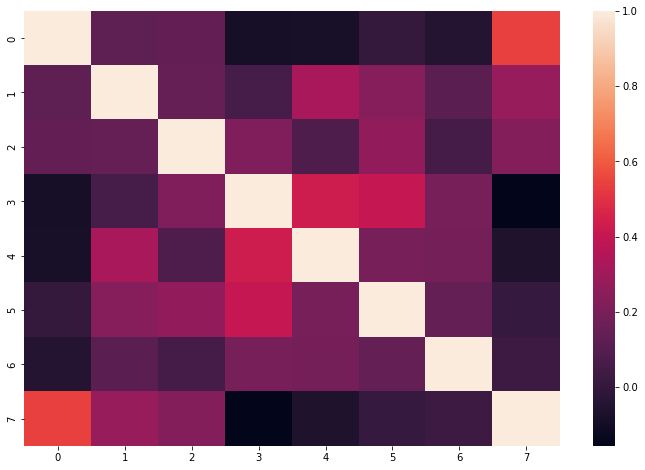

In [285]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat)

In [286]:
def getCorr(data,threshold):
  corr_col = set()
  corrmat = data.corr()
  for i in range(len(corrmat.columns)):
    for j in range(i):
      if abs(corrmat.iloc[i,j]) > threshold :
        colname = corrmat.columns[i]
        corr_col.add(colname)
  return corr_col


In [287]:
corr_features = getCorr(x_train_unique,0.85)
# corr_features
len(corr_features)

0

### Feature Grouping and stacking

In [288]:
corrmat

,0,1,2,3,4,5,6,7
0,1.000000,0.127642,0.141417,-0.084695,-0.080762,0.003036,-0.047203,0.539582
1,0.127642,1.000000,0.147744,0.057374,0.326961,0.234836,0.118450,0.278075
2,0.141417,0.147744,1.000000,0.214119,0.081911,0.264209,0.052385,0.229556
3,-0.084695,0.057374,0.214119,1.000000,0.426754,0.405780,0.194594,-0.156347
4,-0.080762,0.326961,0.081911,0.426754,1.000000,0.192086,0.189132,-0.063597
5,0.003036,0.234836,0.264209,0.405780,0.192086,1.000000,0.145073,0.009823
6,-0.047203,0.118450,0.052385,0.194594,0.189132,0.145073,1.000000,0.027692
7,0.539582,0.278075,0.229556,-0.156347,-0.063597,0.009823,0.027692,1.000000


In [289]:
corrdata = corrmat.abs().stack()
corrdata

0  0    1.000000
   1    0.127642
   2    0.141417
   3    0.084695
   4    0.080762
          ...   
7  3    0.156347
   4    0.063597
   5    0.009823
   6    0.027692
   7    1.000000
Length: 64, dtype: float64

In [290]:
corrdata = corrdata.sort_values(ascending = False)
corrdata

7  7    1.000000
6  6    1.000000
1  1    1.000000
2  2    1.000000
3  3    1.000000
          ...   
6  7    0.027692
7  5    0.009823
5  7    0.009823
0  5    0.003036
5  0    0.003036
Length: 64, dtype: float64

In [291]:
corrdata = corrdata[corrdata > 0.4]
corrdata = corrdata[corrdata < 1]
corrdata

0  7    0.539582
7  0    0.539582
4  3    0.426754
3  4    0.426754
5  3    0.405780
3  5    0.405780
dtype: float64

### Using Tree based classifier

In [292]:
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_unique,y_train)

RandomForestClassifier(random_state=0)

In [293]:
features = x_train_unique.columns
features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [294]:
importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis = 1)
importance.columns = ['features','importance']
importance.sort_values(by = 'importance',ascending = False,inplace = True)
importance

,features,importance
1,1,0.242236
5,5,0.166750
7,7,0.146922
6,6,0.129385
2,2,0.090845
0,0,0.080614
4,4,0.073719
3,3,0.069530


In [295]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,1,0,63
764,2,122,70,27,0,36.8,0.340,27,1,1,0,27
765,5,121,72,23,112,26.2,0.245,30,1,1,0,30
766,1,126,60,0,0,30.1,0.349,47,1,1,0,47


In [296]:
x_tr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HairColor,Adult,Country,Age_1
603,7,150,78,29,126,35.2,0.692,54,0,1,0,54
118,4,97,60,23,0,28.2,0.443,22,0,1,0,22
247,0,165,90,33,680,52.3,0.427,23,0,1,0,23
157,1,109,56,21,135,25.2,0.833,23,0,1,0,23
468,8,120,0,0,0,30.0,0.183,38,0,1,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,1,0,63
192,7,159,66,0,0,30.4,0.383,36,0,1,0,36
629,4,94,65,22,0,24.7,0.148,21,0,1,0,21
559,11,85,74,0,0,30.1,0.300,35,0,1,0,35


In [297]:
train = x_train_unique.drop([0,5,2,6,7,4,3],axis = 1)
test = x_test_unique.drop([0,5,2,6,7,4,3],axis = 1)

In [298]:
%%time
randomForest(train,test,y_train,y_test)

Accuracy(Testing Data) : 
0.7077922077922078
CPU times: user 276 ms, sys: 44.5 ms, total: 320 ms
Wall time: 357 ms


In [299]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [304]:
500/(768)*100

65.10416666666666

In [305]:
x_train_unique.shape

(614, 8)

### For better accuracy using upsampling from SMOTEENN

In [306]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_upsampled,y_upsampled=sm.fit_resample(x,y)
xr_train,xr_test,yr_train,yr_test=train_test_split(x_upsampled,y_upsampled,test_size=0.2)
xr_train.shape,xr_test.shape

((417, 12), (105, 12))

In [307]:
%%time
randomForest(xr_train,xr_test,yr_train,yr_test)

Accuracy(Testing Data) : 
0.9714285714285714
CPU times: user 272 ms, sys: 29.5 ms, total: 301 ms
Wall time: 353 ms
